## Name: TAI NGO
## DSC-650

### Instantiate the convnet

In [1]:
from keras import layers
from keras import models

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


### Add a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Train the convnet on mnist images

In [4]:
# load the MNIST dataset from keras
from keras.datasets import mnist
from keras.utils import to_categorical

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
# normalize
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [7]:
# convert integers to categorical 0/1
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
# compile the model
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 22s 24ms/step - loss: 0.1717 - accuracy: 0.9475 - val_loss: 0.0532 - val_accuracy: 0.9837
Epoch 2/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0344 - val_accuracy: 0.9887
Epoch 3/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0309 - val_accuracy: 0.9888
Epoch 4/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0278 - val_accuracy: 0.9914
Epoch 5/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0304 - val_accuracy: 0.9928


In [9]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0304 - accuracy: 0.9928


In [10]:
print('Test Accuracy:', round(100*test_acc, 2), '%')

Test Accuracy: 99.28 %


### Save the model

In [11]:
model.save('assignment_6-1_mnist_1.h5')

### Validation Plot

In [12]:
import matplotlib.pyplot as plt

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_accuracy']

In [15]:
epochs = range(1, len(acc_values) + 1)

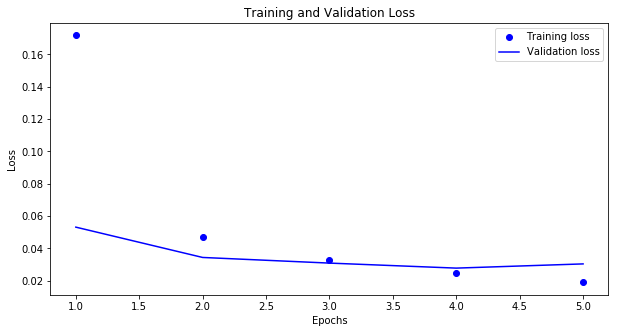

In [16]:
# plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

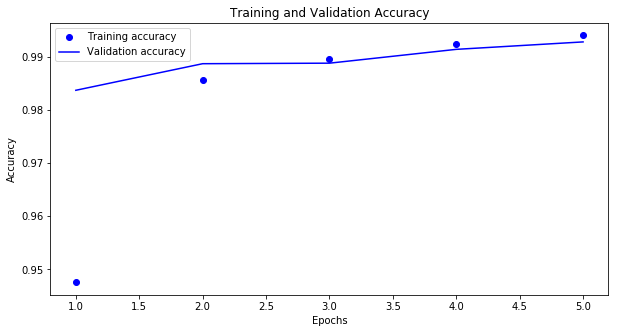

In [17]:
# plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Prediction

In [18]:
val_pred = model.predict(test_images)

In [19]:
val_pred

array([[1.2292442e-12, 5.4475202e-10, 3.1048838e-08, ..., 1.0000000e+00,
        3.0666333e-12, 3.5984460e-08],
       [1.1183198e-12, 1.2321968e-09, 1.0000000e+00, ..., 2.7747424e-14,
        9.8338221e-15, 8.0996828e-20],
       [4.0435000e-10, 1.0000000e+00, 3.2555540e-08, ..., 5.6175661e-08,
        1.8155900e-08, 8.1993639e-09],
       ...,
       [7.6948476e-21, 3.3312044e-13, 1.9409953e-14, ..., 1.6069704e-10,
        1.9096971e-10, 8.6245122e-10],
       [3.0705863e-10, 7.0425237e-12, 5.2621865e-12, ..., 1.2970328e-13,
        2.6576616e-05, 4.0871534e-10],
       [6.9752030e-12, 1.9512347e-12, 4.9979319e-11, ..., 1.1981583e-16,
        2.9249200e-11, 3.3348564e-15]], dtype=float32)

In [20]:
from keras.datasets import cifar10
from keras.utils import to_categorical

In [21]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [22]:
# normalize
train_images = train_images.astype('float32') / 255.0

test_images = test_images.astype('float32') / 255.0

In [23]:
train_images.shape

(50000, 32, 32, 3)

### Instantiate the convnet for cifar10 classification

In [24]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [25]:
# configure the model for training
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
# fit the model using a batch generator
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))                             

Epoch 1/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.5052 - accuracy: 0.4536 - val_loss: 1.2392 - val_accuracy: 0.5521
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1557 - accuracy: 0.5905 - val_loss: 1.1644 - val_accuracy: 0.5833
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0053 - accuracy: 0.6477 - val_loss: 1.0058 - val_accuracy: 0.6433
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9002 - accuracy: 0.6856 - val_loss: 0.9507 - val_accuracy: 0.6674
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8179 - accuracy: 0.7119 - val_loss: 0.9378 - val_accuracy: 0.6771
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7509 - accuracy: 0.7369 - val_loss: 0.9428 - val_accuracy: 0.6675
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6988 - accuracy: 0.7531 - val_loss: 0.9363 -

### Save the model

In [27]:
model.save('assignment_6-2_cifar10.h5')

### Validation Plot

In [31]:
history_dict = history.history
history_dict.keys()
epochs = range(1, len(acc_values) + 1)
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_accuracy']

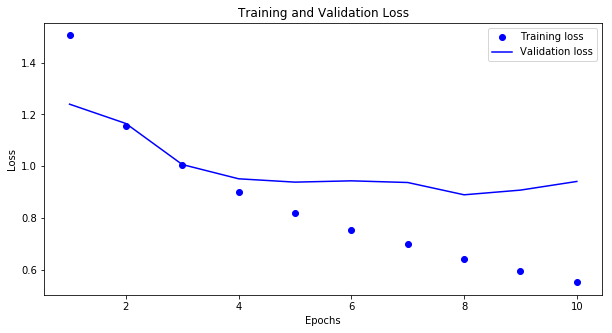

In [32]:
# plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

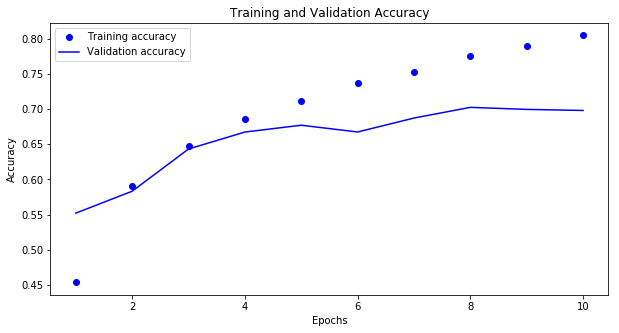

In [33]:
# plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.9404 - accuracy: 0.6981


### Prediction

In [35]:
val_pred = model.predict(test_images)
val_pred

array([[2.3864425e-06, 2.2062505e-04, 1.6617734e-04, ..., 8.3527866e-06,
        7.6506557e-03, 1.4013087e-04],
       [2.5074224e-03, 1.2253711e-02, 6.8799872e-09, ..., 7.5317474e-11,
        9.8521221e-01, 2.6660447e-05],
       [5.4601932e-01, 2.4647396e-02, 7.5439783e-03, ..., 1.7674405e-03,
        3.9252278e-01, 9.8137022e-04],
       ...,
       [7.6858399e-08, 1.8883522e-08, 2.5658385e-04, ..., 1.6102027e-03,
        3.1221157e-07, 2.9463987e-09],
       [2.9413611e-02, 5.2371854e-04, 3.1975782e-03, ..., 1.2181142e-04,
        8.6549844e-06, 4.7481165e-04],
       [7.5428169e-10, 4.8540967e-13, 2.6082956e-09, ..., 9.9934357e-01,
        2.4228454e-11, 2.4961636e-10]], dtype=float32)

In [36]:
from keras.datasets import cifar10
from keras.utils import to_categorical

In [37]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [38]:
# normalize
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255.0

In [39]:
# set up a data augmentation configuration via ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

In [40]:
# import libraries
from keras import layers
from keras import models
from keras import optimizers

# build model with Dropout
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5))     # include Dropout
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# configure the model for training
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [41]:
it_train = datagen.flow(train_images, train_labels, batch_size=64)

In [42]:
history = model.fit_generator(it_train, steps_per_epoch=100, epochs=10, 
                              validation_data=(test_images, test_labels))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
100/100 [==============================] - 10s 104ms/step - loss: 2.2851 - accuracy: 0.0870 - val_loss: 2.2298 - val_accuracy: 0.0565
Epoch 2/10
100/100 [==============================] - 10s 102ms/step - loss: 2.1723 - accuracy: 0.1748 - val_loss: 2.0757 - val_accuracy: 0.0048
Epoch 3/10
100/100 [==============================] - 10s 105ms/step - loss: 2.0834 - accuracy: 0.1363 - val_loss: 2.0049 - val_accuracy: 0.1554
Epoch 4/10
100/100 [==============================] - 10s 104ms/step - loss: 2.0261 - accuracy: 0.1330 - val_loss: 1.9513 - val_accuracy: 0.1211
Epoch 5/10
100/100 [==============================] - 10s 105ms/step - loss: 1.9972 - accuracy: 0.1197 - val_loss: 1.8992 - val_accuracy: 0.0443
Epoch 6/10
100/100 [==============================] - 10s 104ms/step - loss: 1.9446 - accuracy: 0.1270 - val_loss: 1.8692 - val_accuracy: 0.0413
Epoch 7/10
100/100 [==============================] - 

In [43]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy',  round(test_acc * 100.0, 2),'%')

313/313 [==============================] - 3s 9ms/step - loss: 1.9055 - accuracy: 0.0628
Test Accuracy 6.28 %


### Save model

In [44]:
model.save('assignment_6_2b_cifar10.h5')

### Validation Plot

In [45]:
history_dict = history.history
history_dict.keys()
epochs = range(1, len(acc_values) + 1)
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values = history_dict['val_accuracy']

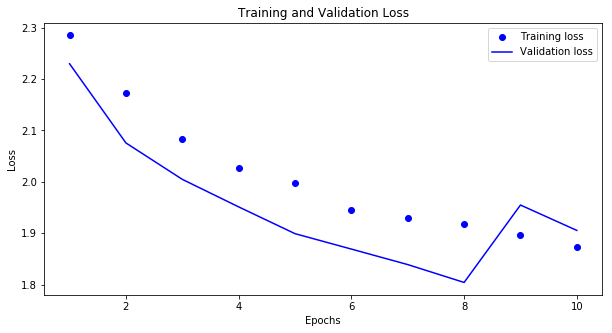

In [46]:
# plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

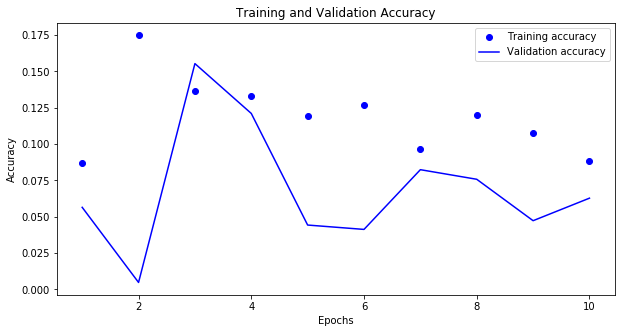

In [47]:
# plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy',  round(test_acc * 100.0, 2),'%')

313/313 [==============================] - 3s 9ms/step - loss: 1.9055 - accuracy: 0.0628
Test Accuracy 6.28 %


### Prediction

In [51]:
val_pred = model.predict(test_images)
val_pred

array([[0.03734807, 0.3889705 , 0.02691204, ..., 0.05343005, 0.05180158,
        0.19767562],
       [0.11480242, 0.35378602, 0.011406  , ..., 0.00525376, 0.22527413,
        0.27966386],
       [0.28686324, 0.17388158, 0.03429477, ..., 0.01204457, 0.28844672,
        0.17430124],
       ...,
       [0.0236279 , 0.0768773 , 0.04265433, ..., 0.24235703, 0.01578642,
        0.06970799],
       [0.03111869, 0.39488587, 0.03277609, ..., 0.07371336, 0.04958914,
        0.19606546],
       [0.0464095 , 0.0409222 , 0.07262907, ..., 0.29228264, 0.02884196,
        0.15357535]], dtype=float32)

In [53]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# load ResNet50 model
model = ResNet50(weights='imagenet')

# predict an elephant image
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 1us/step
Predicted: [('n02504458', 'African_elephant', 0.6691226), ('n01871265', 'tusker', 0.19451956), ('n02504013', 'Indian_elephant', 0.12981321)]


In [54]:
# predict an lion image
img_path = 'lion.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02129165', 'lion', 0.99943024), ('n02437312', 'Arabian_camel', 0.0002564587), ('n02088094', 'Afghan_hound', 0.00010242165)]


In [55]:
# predict a bear image
img_path = 'bear.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02132136', 'brown_bear', 0.9987527), ('n02133161', 'American_black_bear', 0.0010594708), ('n02134418', 'sloth_bear', 9.413755e-05)]


In [56]:
# predict a cat image
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02127052', 'lynx', 0.33959246), ('n02124075', 'Egyptian_cat', 0.2809018), ('n02123159', 'tiger_cat', 0.097387515)]


In [57]:
# predict a dog image
img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02099712', 'Labrador_retriever', 0.9738225), ('n02099601', 'golden_retriever', 0.011003506), ('n02087394', 'Rhodesian_ridgeback', 0.001668105)]
